# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

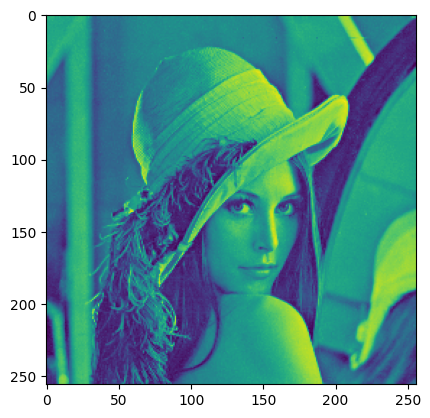

In [4]:
lena=plt.imread("data/lena.png")
plt.imshow(lena)

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [36]:
def prewitt_h(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if (p[0]>=1) and (p[1]>=1) and (p[0]<=img.shape[0]-2) and (p[1]<=img.shape[1]-2):
            mask_h=numpy.array([[-1,0,1],[-1,0,1],[-1,0,1]])
            for q in numpy.ndindex(3,3):
                neighborhood_sum = neighborhood_sum + mask_h[q]*img[(p[0]+q[0]-1),(p[1]+q[1]-1)]
                result[p]=neighborhood_sum/6
    return result
    
def prewitt_v(img):
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if (p[0]>=1) and (p[1]>=1) and (p[0]<=img.shape[0]-2) and (p[1]<=img.shape[1]-2):
            for q in numpy.ndindex(3,3):
                if q[0]==0:
                    f=-1
                elif q[0]==1:
                    f=0
                else: 
                    f=1
                neighborhood_sum = neighborhood_sum + f*img[(p[0]+q[0]-1),(p[1]+q[1]-1)]
            result[p]=neighborhood_sum/6
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

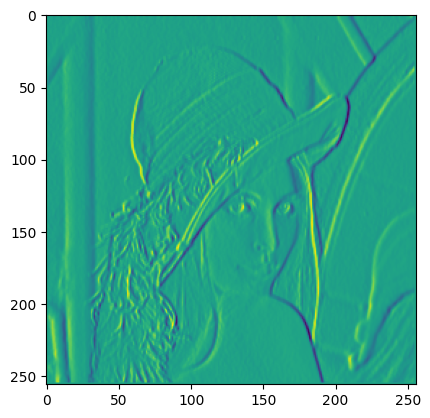

In [38]:
plt.imshow(prewitt_h(lena))

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

In [39]:
import skimage.io
lena2=skimage.io.imread('data/lena_prewitt_h.tiff')
assert numpy.allclose(prewitt_h(lena),lena2, atol=1/255)

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

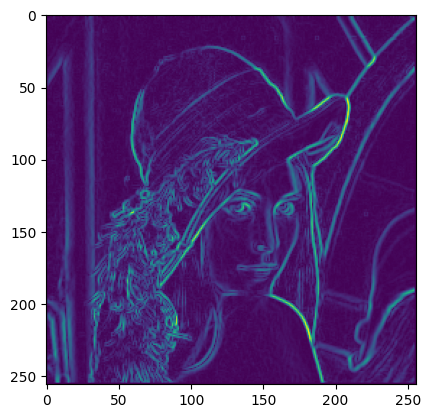

In [41]:
lenaedge=numpy.sqrt(prewitt_h(lena)**2+prewitt_v(lena)**2)
plt.imshow(lenaedge)

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

In [42]:
lena3=skimage.io.imread('data/lena_prewitt_gradmag.tiff')
assert numpy.allclose(lenaedge,lena3, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`: